<h1> <center> Natural Language Processing in Risk and Finance </h1>
<h3> <center> Developing an Insurance Clustering Model</h3>
<center> <small>by <a href="https://juliandoerr.com">Julian Dörr</a></small>
<br>
<br>

_________________________
_________________________

## <a id='toc1_'></a>About this Course

Course outline

<a id='toc0_'></a>    
- 1. [About this Course](#toc1_)    
  - 1.1. [What you will learn](#toc1_1_)    
- 2. [What is Natural Language Processing?](#toc2_)    
- 3. [Application of Natural Language Processing in Risk Management](#toc3_)    
  - 3.1. [A real-world use case: Automated Claims Processing](#toc3_1_)    
- 4. [Developing an Insurance Claims Clustering Model](#toc4_)    
  - 4.1. [Data Inspection](#toc4_1_)    
  - 4.2. [Tokenization](#toc4_2_)    
  - 4.3. [Stopwords](#toc4_3_)    
  - 4.4. [Vocabulary](#toc4_4_)    
  - 4.5. [Text Vectorization](#toc4_5_)    
    - 4.5.1. [Word count vectorizer](#toc4_5_1_)    
    - 4.5.2. [Weighted word count vectorizer](#toc4_5_2_)    
    - 4.5.3. [Static word embeddings](#toc4_5_3_)    
    - 4.5.4. [Contextualized embeddings](#toc4_5_4_)
      - 4.5.4.1. [BERT](#toc4_5_4_1_)
      - 4.5.4.2. [SBERT](#toc4_5_4_2_) 
  - 4.6. [Topic Modeling](#toc4_6_)    
    - 4.6.1. [*Bonus*: Using Generative AI to improve topic names](#toc4_6_1_)    
  - 4.7. [Model Provisioning](#toc4_7_)    
    - 4.7.1. [Streamlit](#toc4_7_1_)
    - 4.7.2. [FastAPI](#toc4_7_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>What you will learn

- **Fundamental Concepts**: Overview of NLP and its relationship with Artificial Intelligence (AI) and Deep Learning (DL).

- **Applied NLP**: Discover how to effectively process insurance claims using advanced NLP techniques.

- **Text Data Processing**: Master the techniques to transform raw text data into a machine-readable format, including:
    - Tokenization: Breaking text into individual words or phrases.
    - Vocabulary Creation: Building a set of unique words from the text.
    - Vectorization: Converting text into numerical representations for analysis.

- **Linguistic representation**: Discover how recent advancements in NLP allow for capturing different levels of linguistic complexity.

- **Topic Modeling**: Learn to cluster text data into meaningful groups, facilitating insights and organization of information.

- **Foundations of Generative AI**: This course lays the groundwork for understanding Generative AI models that produce human-like language.

## <a id='toc2_'></a>What is Natural Language Processing?

Natural Language Processing (NLP) is a **specialized branch of AI** where methods from the field of Machine Learning and Deep Learning are applied to **bridge the gap between human communication and machine understanding**. 
<div style="text-align: center;">
<img src="img/ai_ml_dl_nlp.png" alt="AI, ML, DL & NLP" width="900" style="height: auto;">
<p><small>Image source: Author</small></p>
</div>

<font color="#58e4d4"><b>Artificial Intelligence (AI)</b></font>

AI is the overarching field that encompasses all technologies and systems designed to **simulate human intelligence**. This includes tasks like reasoning, problem-solving, learning, and decision-making.

<font color="#20b49c"><b>Machine Learning (ML)</b></font>

Machine learning is a subset of AI that enables systems to **learn from data** and improve their performance over time without being explicitly programmed. ML algorithms identify patterns in structured data and use these patterns to **make predictions or decisions**.

<font color="#086c5c"><b>Deep Learning (DL)</b></font>

Deep learning is a specialized branch of ML that uses **artificial neural networks** inspired by the human brain. These networks are particularly effective at processing large amounts of **unstructured data**, such as images, text, and audio.

<font color="#08544c"><b>Natural Language Processing (NLP)</b></font>

Natural language processing is a **specialized branch of AI** that focuses on **enabling machines to understand, interpret, and generate human language**. It bridges the gap between human communication and machine understanding.

NLP draws on concepts from linguistics, computer science, and AI to process and analyze natural language data. It is often **powered by ML and DL techniques**, which help machines learn from vast amounts of text data and improve their language understanding capabilities.

> **Natural Language Processing** is an applied field of artificial intelligence focused on **enabling machines to understand, interpret, and generate human language** in a meaningful way.

## <a id='toc3_'></a>Application of Natural Language Processing in Risk Management

NLP in risk management enhances the ability to **analyze** unstructured data, such as **news articles, social media, and customer feedback, to identify potential risks, emerging trends, and fraudulent activities**. By leveraging techniques like **sentiment analysis**, **text clustering**, and **text summarization**, NLP can **automate the extraction of relevant information**, improve accuracy, and enable faster response times.

### <a id='toc3_1_'></a>A real-world use case: Automated Claims Processing

In the following, we will explore a real-world use case commonly encountered by **insurance companies**: the process of **reviewing insurance claims submitted by policyholders**.

Instead of dealing with claims manually, **NLP algorithms are used to extract relevant information** from unstructured data sources: claim forms, emails, and documents. Once done, they **automatically categorise and prioritise claims** based on their severity and complexity, ensuring that urgent or complex claims receive prompt attention while routine claims are processed efficiently.

> An **insurance claim** is a formal **request** made by a policyholder to an insurance company for **coverage for losses** or damages incurred that are covered under the insurance policy.

Claims processing is a multi-step process which bears great potential for automation using NLP techniques.
<div style="text-align: center;">
    <img src="img/claims_processing.png" alt="Claims processing" width="1000" style="height: auto;"/>
    <p><small>Image source: Author</small></p>
</div>

## <a id='toc4_'></a>Developing Insurance Claims Clustering Model

### <a id='toc4_1_'></a>Data Inspection

First, we import `pandas` a popular Python library that is designed to work with rectangular data.

In [1]:
import pandas as pd

Then, we read the insurance claims.

In [2]:
df_claims = pd.read_csv('data/claims.csv')

Next, we will take a first look at the data.

In [3]:
df_claims.head(3).style

,claim_description
0,"THE IV WAS MAKING A LEFT TURN ON A GREEN ARROW WHEN A PEDESTRIAN RAN INTO THE P/S OF IV. THE IV WAS DENTED ON THE FRONT P/S OF THE HOOD, THEN FELL BACKWARDS TO THE PAVEMENT. THE PEDESTRIAN EXPERIENCED A LUMP ON HIS HEAD."
1,CLAIMANT ALLEGES SHE SUFFERED INJURIES IN AN ELEVATOR.
2,"IV PASSENGER SUSTAINED INJURIES, OV AND IV COLLIDED CAUSING IV TO HIT ANOTHER OV AS WELL"


Raw data is often messy containing, e.g., null values.

In [4]:
# =================================================================================
# 🚨 Coding Task 🚨
# ❓How many rows do not have a claim_description entry?
# =================================================================================


In [5]:
# =================================================================================
# 🚨 Coding Task 🚨
# ❗Remove rows with no claim description.
# =================================================================================
df_claims = # Conclude this line with your solution


We also drop duplicated claim descriptions.

In [6]:
df_claims.drop_duplicates(keep="first", inplace=True)

In [7]:
df_claims.shape[0]

163908

Our data comprise 163,908 claim descriptions.

Next, lowercase all words, reducing variability caused by case differences. For example, "Insurance", "insurance", and "INSURANCE" are treated as the same word after lowercasing.

In [8]:
df_claims['claim_description'] = df_claims.claim_description.apply(lambda text: text.lower())

In [9]:
df_claims.sample(3).style

,claim_description
143473,gym floor is buckling due to water damage from past when roof leaked. they don't have a date at this time. roof has been repaired.
30381,"operator was at the red light. when light changed, she started to proceed thru intersection. thats when a bicyclist came across the front of the bus. she braked before striking bicyclist. she got out of bus he was standing in front of bus. she asked bicyclist ifhe was ok the bicyclist nodded his head in the up and down motion then raised his hand to the operator and kept going."
102957,"the ov driver was behind a car that was turning right, so he pulled out of the lane to go around the other car. at that moment,the ov driver entered the lane of the iv and they collided. the ivhad a scuffed front bumper and scratches down the p/s. the ov had damage to the front d/s bumper, fender, and mirror. there were no injuries reported."


### <a id='toc4_2_'></a>Tokenization

**Tokenization** in NLP is the process of **dividing text into smaller units called tokens**, which can be **words, phrases, or symbols**. It is essential for enabling machines to analyze and understand unstructured text data effectively.

In the following section, we will utilize the `re` module to implement our custom tokenization logic. Regular expressions (regex) are a powerful tool for string manipulation and can effectively extract tokens from text.

> **Regular expressions** (regex) are sequences of characters that define search patterns, allowing users to efficiently find, match, or manipulate strings of text based on specific criteria.

In [10]:
import re

tokenize_pattern = re.compile(r"\b\w\w+\b")

- \w: **word character** like letters (both lowercase and uppercase), digits or underscores. \w\w+ means that at least 2 word characters need to follow one another.
- \b: **word boundary** position where a word character is followed by a non-word character (e.g. space or punctuation).

With the above tokenizer, we can now split any string into a list of tokens.

In [11]:
claim = 'Broken rear window while parked. Window splinter caused damage to other vehicle.'

In [12]:
tokens = tokenize_pattern.findall(claim.lower())

In [13]:
tokens

['broken',
 'rear',
 'window',
 'while',
 'parked',
 'window',
 'splinter',
 'caused',
 'damage',
 'to',
 'other',
 'vehicle']

### <a id='toc4_3_'></a>Stopwords

**Stopwords are common words in a language**, such as "the," "is," and "and," that **carry little semantic value** and are often removed in NLP tasks to reduce noise and allow the model to focus on words that contribute more significantly to the meaning of the text.

There are pre-defined lists of stopwords for different languages. We use the English stopword list from the `nltk` library.

In [14]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords', quiet=True)

True

Using list comprehension we can now create our stopword list with lowercased words only.

In [15]:
stopwords_en = [stopword.lower() for stopword in stopwords.words('english')]

len(stopwords_en)

198

In [16]:
stopwords_en[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

We now tokenize the insurance claims and remove stopwords. Moreover, we count how often each word occurs in the corpus of insurance claims.

> In NLP, a **corpus** is a large and structured **collection of text data** used for linguistic analysis and model training.

In [17]:
from tqdm import tqdm
from collections import Counter

word_counter = Counter()

# Process each claim and update the word counter
for claim_description in tqdm(df_claims.claim_description.values):
    # Split the claim into words using the regex pattern
    words = tokenize_pattern.findall(claim_description)

    # Filter out empty strings and stopwords and update the counter
    word_counter.update(word for word in words if word and word not in stopwords_en)

# Convert the Counter to a dictionary
word_frequencies = dict(word_counter)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 163908/163908 [00:09<00:00, 17004.44it/s]


What are the most common words found in the corpus.

In [18]:
word_counter.most_common(10)

[('iv', 64559),
 ('vehicle', 43971),
 ('driver', 40287),
 ('damage', 38508),
 ('ov', 37739),
 ('injuries', 35219),
 ('claimant', 24936),
 ('reported', 24408),
 ('front', 23829),
 ('customer', 23375)]

Please note that "iv" is an abbreviation for "insured vehicle" and "ov" stands for "other vehicle."

Little surprisingly, the most common words in the corpus are words from the insurance domain

### <a id='toc4_4_'></a>Vocabulary

We will now establish the **vocabulary** that is crucial for **defining the scope of language** that the claims processing model can effectively understand and process.

> A **vocabulary** is a set of **unique words in a corpus**.

In [19]:
# =================================================================================================
# 🚨 Coding Task 🚨
# ❗Derive the the vocabulary for the insurance claim dictionary using the word_frequencies object.
# Hint: Check the data type of word_frequencies and think about how to retrieve the words from the
# object. Also note that a proper vocabulary list is ordered alphabetically.
# =================================================================================================
vocabulary =   # Conclude this line with your solution


In [20]:
len(vocabulary)

93208

Our vocabulary consists of **93,208 distinct words**, which is considered quite extensive.

The [Oxford Dictionary](https://www.oed.com/), for example, contains approximately 273,000 headwords, with 171,476 currently in use.

Let's take a moment to explore which words have made their way into our vocabulary.

In [21]:
vocabulary[:10]

['00',
 '000',
 '0000',
 '00000',
 '0000000115192chef',
 '0000000115196',
 '000001',
 '000001593',
 '000007',
 '000019']

Our tokenizer definition also extracts number sequences as tokens, since \w matches **word characters**, including letters and digits. However, we typically do not want these number sequences in our vocabulary. Therefore, we **remove any tokens** that are **not part of the official English dictionary**. To achieve this, we utilize `nltk`, which provides a comprehensive list of English words.

In [22]:
from nltk.corpus import words

nltk.download('words', quiet=True)
dictionary = set(words.words())

In [23]:
dictionary = {word.lower() for word in dictionary}

In [24]:
len(dictionary)

234377

The `nltk` dictionary comprises 234,377 words which is close to the number of headwords found in the Oxford Dictionary.

We will now refine our vocabulary to include only those words that are part of the dictionary.

In [25]:
# ===============================================================================================================
# 🚨 Coding Task 🚨
# ❗Remove all words from the vocabulary that are not part of the dictionary. Can you do it in one line of code?
# Hint: Use list comprehension for the one liner (see e.g. https://www.mrdbourke.com/python-list-comprehensions-in-5-minutes/).
# ===============================================================================================================
vocabulary =  # Conclude this line with your solution


In [26]:
len(vocabulary)

16283

We end up with a vocabulary of 16,283 distinct words.

In [27]:
vocabulary[-10:]

['zip',
 'zipper',
 'zonar',
 'zone',
 'zoned',
 'zoning',
 'zoo',
 'zoom',
 'zoster',
 'zucchini']

### <a id='toc4_5_'></a>Text Vectorization

Text vectorization is the process of **converting textual data into numerical vectors** that machine learning algorithms can understand.

Language exhibits **various levels of complexity**, and **recent advancements** in text vectorization techniques are now capable of **capturing higher levels of language complexity**.
<div style="text-align: center;">
    <img src="img/linguistic_domains.png" alt="Domains of Language" width="600" style="height: auto;">
    <p><small>Image source: Author</small></p>
</div>

#### <a id='toc4_5_1_'></a>Word count vectorizer

One of the simplest methods for text vectorization is the **bag-of-words (BoW) representation**, where a BoW **vector has a length equal to the entire vocabulary**, $V$, and its **values** indicate the **frequency of each word**'s occurrence, $tf$, in a text.

**BoW** vectorization **captures lexical features** of language.
<div style="text-align: center;">
<img src="img/tf.png" alt="BoW" width="600" style="height: auto;">
<p><small>Image source: Author</small></p>
</div>

In the following, we vectorize the corpus of claims descriptions via the number of occurences of each word from the vocabulary by using `scikit-learn`'s `CountVectorizer` class.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vectorizer = CountVectorizer(vocabulary=vocabulary, lowercase=True)

In [30]:
X = vectorizer.fit_transform(df_claims.claim_description.values)

Given the fitted `vectorizer`, we can now transform any string into a count vector representation.

In [31]:
x = vectorizer.transform([claim])

In [32]:
from util import print_sparse_vector

print_sparse_vector(x, vocabulary)

Non-zero elements:
broken   : 1884  	-> 1
damage   : 3708  	-> 1
rear     : 11408 	-> 1
splinter : 13421 	-> 1
vehicle  : 15535 	-> 1
window   : 16035 	-> 2


The resulting vector has $V$ = 16,283 elements with only 6 of it being non-zero. High-dimensional vectors with predominantly zero values are called **sparse vectors**.

> **Sparse vectors** are defined by their **high dimensionality**, with the **majority of** their **elements being zero**. This characteristic makes sparse vector embeddings especially valuable for traditional information retrieval tasks, like keyword matching, where identifying the presence or absence of specific terms is essential.

Some words of the below claim are not part of the vocabulary because they are not in the dictionary ...

In [33]:
claim

'Broken rear window while parked. Window splinter caused damage to other vehicle.'

In [34]:
'parked' in dictionary, 'caused' in dictionary

(False, False)

... or because they are stopwords.

In [35]:
'while' in stopwords_en, 'to' in stopwords_en, 'other' in stopwords_en

(True, True, True)

#### <a id='toc4_5_2_'></a>Weighted word count vectorizer

**Weighted Bag-of-Words** techniques like TF-IDF **give more importance to words that are rare across the corpus but frequent in a specific document**, highlighting their uniqueness and relevance.

**Tf-idf** vectorization **captures lexical features** of language.
<div style="text-align: center;">
<img src="img/tf-idf.png" alt="Tf-idf"  width="950" style="height: auto;">
<p><small>Image source: Author</small></p>
</div>

We use **scikit-learn**'s **TfidfVectorizer** to get a weighted term frequency representation of the claims descriptions.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vectorizer = TfidfVectorizer(
    vocabulary=vocabulary, 
    lowercase=True, 
    use_idf=True, 
    smooth_idf=False, 
    norm=None)

In [38]:
X = vectorizer.fit_transform(df_claims.claim_description.values)

Again, given the fitted `vectorizer`, we can now transform any string into a weighted count vector representation.

In [39]:
x = vectorizer.transform([claim])

In [40]:
from util import print_sparse_vector

print_sparse_vector(x, vocabulary)

Non-zero elements:
broken   : 1884  	-> 4.834613755448113
damage   : 3708  	-> 2.6412865931534353
rear     : 11408 	-> 3.2018475905231045
splinter : 13421 	-> 9.605863192128737
vehicle  : 15535 	-> 2.7780534033236877
window   : 16035 	-> 11.333747476941554


The tf-idf value is derived as follows:
<div style="text-align: center;">
$tf\text{-}idf = term \, frequency \times \left(log\left(\frac{number \, of \, documents}{document \, frequency}\right) + 1\right) = tf \times \left(log\left(\frac{N}{df}\right) + 1\right)$
</div>

For the word 'window', for example, the value can be derived as follows:

In [41]:
# Document frequency: How many documents contain the word 'broken'
word = re.compile(r'(?u)\b(window)\b')

df = df_claims.claim_description.apply(lambda text: bool(word.search(text))).sum()
df

1541

In [42]:
# Number of documents: How many claims are in the dataset
N = df_claims.shape[0]
N

163908

In [43]:
# Term frequency: How many times the word 'broken' appears in the claim
tf = 2

In [44]:
import numpy as np

tf * (np.log(N/df) + 1)

11.333747476941554

The problem of **count-based methods** is that they **cannot capture the meanings or context of words**. Words are more than just combinations of letters; their meanings depend on how they are used in different contexts.

The following vectorization techniques are designed to effectively capture the semantic properties of words.

#### <a id='toc4_5_3_'></a>Static word embeddings

The basic idea of word embeddings can be best described by the following quote.

"You shall know a word by the company it keeps!" <br> 
*Firth (1957)*

This means that in order to **represent the semantic meaning of a word**, **knowing its surrounding words is essential**.
<div style="text-align: center;">
<img src="img/word_embedding.png" alt="Word embedding"  width="950" style="height: auto;">
<p><small>Image source: Author</small></p>
</div>

**[word2vec](https://code.google.com/archive/p/word2vec/) employs neural language modeling** to create vector representations of words, utilizing **deep learning** techniques to convert words into numerical vectors. These **vectors encapsulate** the **meaning of a word** by **taking into account** the **context provided by surrounding words**.
<div style="text-align: center;">
<img src="img/word2vec.png" alt="Word2vec" width="900" style="height: auto;">
<p><small>Image source: Author</small></p>
</div>

word2vec comes in many variants. The variant below employs a shallow neural network where the learning task is to **predict surrounding words given a target word** as input. This approach is called **Continuous Bag of Words** (CBoW).
<div style="text-align: center;">
<img src="img/word2vec_training.png" alt="word2vec" width="1100" style="height: auto;">
<p><small>Image source: Author</small></p>
</div>

The word vector representations, known as **word embeddings**, are **generated as a by-product of the training process** within the weights matrix of the hidden layer.
<div style="text-align: center;">
<img src="img/word2vec_embedding.png" alt="Word embedding" width="850" style="height: auto;">
<p><small>Image source: Author</small></p>
</div>

Training a neural language model to retrieve word embeddings for the vocabulary of our claims corpus is beyond the scope of this course.

However, there are many **pre-trained word embeddings**. Moving on, we work with [**Global Vectors for Word Representation (GloVe)**](https://nlp.stanford.edu/projects/glove/) vectors that where trained on Wikipedia articles.

In [45]:
import gensim.downloader

glove = gensim.downloader.load('glove-wiki-gigaword-50')

Pre-trained word embeddings come with their own vocabulary.

In [46]:
vocabulary_glove = sorted(list(glove.key_to_index))

In [47]:
len(vocabulary_glove)

400000

The vocabulary comprises 400,000 tokens.

The static word embedding can then be retrieved as simple key-value pairs.

In [48]:
x = glove.get_vector("window")

In [49]:
from util import print_vector

print_vector(x, rounding_digit=4)

The **GloVe embeddings** have only $E$ = 50 elements which is **notably smaller than** the **sparse vectors** introduced before (note their size equaled the vocabulary size $V$, with $V >> E$.). Word embeddings are referred to as **dense vectors** where **most elements contain non-zero values**, **capturing rich semantic relationships** and **syntactic information**.

> **Dense vectors** are **lower-dimensional** vector representations of words with **most of the elements containing non-zero values**. They effectively capture nuanced information, such as semantics, making them ideal for complex NLP applications like semantic search.

The **semantic information** captured **by word embeddings** becomes apparent when looking at the most similar words to a certain target word.

In [50]:
glove.most_similar("insured")

[('insures', 0.7770076990127563),
 ('premiums', 0.7484705448150635),
 ('uninsured', 0.7398187518119812),
 ('nonperforming', 0.7294138073921204),
 ('borrowers', 0.7286937236785889),
 ('homeowners', 0.7117431163787842),
 ('policyholders', 0.7088398933410645),
 ('compensated', 0.7084636688232422),
 ('taxpayers', 0.7040116786956787),
 ('delinquent', 0.7036601305007935)]

Not only are similar words like 'insured' and 'policyholders' positioned close to each other in vector space, but it is also **possible to perform arithmetic operations**, like `king - man + woman`, to reveal meaningful relationships captured by the embeddings.
<div style="text-align: center;">
<img src="img/king-analogy-viz.png" alt="Word arithmetics" width="800" style="height: auto;">
<p><small>Image source: <a href="https://jalammar.github.io/illustrated-word2vec/">Jay Alammar</a></small></p>
</div>

In [51]:
glove.most_similar(positive=['king', 'woman'], negative=['man'], topn=3)

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172)]

In [52]:
# =====================================================================================================================
# 🚨 Coding Task 🚨
# ❓Can you find other examples that demonstrate the semantic and syntactic relationships captured by word embeddings?
# Play around!
# =====================================================================================================================


The development of **word embeddings** has significantly advanced AI's capabilities in NLP applications, yet they **still face notable challenges** in effectively representing text as meaningful vectors:

1. **Limitations to words**: While word2vec excels at **vectorizing individual words**, it **does not extend this capability to entire texts**, such as descriptions of claims. This restricts its utility in contexts where understanding the full meaning of phrases or sentences is crucial.

One seemingly simple way to represent whole sentences, paragraphs, or documents as dense vectors is to average the word embeddings of all the words they contain, producing a single embedding for the entire sentence.

In [53]:
claim

'Broken rear window while parked. Window splinter caused damage to other vehicle.'

In [54]:
word_embeddings = np.array([glove.get_vector(word) for word in tokenize_pattern.findall(claim.lower())])

word_embeddings.shape

(12, 50)

In [55]:
x = word_embeddings.mean(axis=0)

In [56]:
print_vector(x, rounding_digit=4)

In practice, however, this approach doesn’t deliver good results.

2. **Static Nature of Embeddings**: Static embeddings assign the **same vector to a word, ignoring different contexts in which it may appear**. This means they cannot capture a word's different meanings in various contexts.
<div style="text-align: center;">
    <img src="img/polysemy.png" alt="Polysemy" width="800" style="height: auto;">
    <p><small>Image source: Author</small></p>
</div>

3. **Unknown words**: word2vec **cannot handle unknown or out-of-vocabulary words**, but it can generate vector representations only for the words that are included in its vocabulary.

To address these limitations, recent advancements in NLP have introduced **contextualized** (sentence) **embeddings**, which we will explore in more detail next.

#### <a id='toc4_5_4_'></a>Contextualized embeddings

##### <a id='toc4_5_4_1_'></a>BERT

The most prominent and widespread way to derive contextualized embeddings are **Bidirectional Encoder Representations from Transformers** ([**BERT**](https://arxiv.org/abs/1810.04805)) developed by researchers at Google.

Several training techniques and architectural features enable BERT to overcome the limitations of static embeddings. Below is a brief overview:

1. **Tokenization**

- BERT employs **subword tokens** to represent out-of-vocabulary words, allowing terms like "underwriting" to be split into `['under', '##writing']`, enabling vector representation even if the term wasn't in the training corpus.


- It also uses **special tokens** like `[CLS]` to present the entire input sequence and `[SEP]` to reflect the separation of two sentences or the end of an input sequence.


2. **Initial Embedding Layer**

Each token is converted into a **dense vector representation** through an embedding layer. 

This layer combines three types of embeddings:

- Token embeddings: Represent the meaning of each token.

- Segment embeddings: Indicate whether a token belongs to the first or second sentence in tasks involving sentence pairs.

- Position embeddings: Encode the position of each token in the sequence, allowing BERT to understand word order.

In BERT, the input embeddings are created by adding together the token embeddings, segmentation embeddings, and position embeddings.
<div style="text-align: center;">
    <img src="img/embedding_types.png" alt="Embedding types" width="800" style="height: auto;">
    <p><small>Image source: <a href="https://arxiv.org/pdf/1810.04805">Devlin et al.</a></small></p>
</div>

3. **Transformer Encoder Layers**

- BERT utilizes a stack of **transformer** encoder layers that apply **self-attention** mechanisms to **analyze relationships between all tokens in the input sequence**. This enables BERT to capture the context of each token based on its surrounding tokens, allowing for a bidirectional understanding of context.

- The embeddings for each token are updated iteratively, incorporating more contextual information at each step.

**Attention layer** allows model to **learn how tokens are associated to one another**.
<div style="text-align: center;">
    <img src="img/attention.png" alt="Attention" width="400" style="height: auto;">
    <p><small>Image source: Author</small></p>
</div>

4. **Smart Training Objectives**

Training BERT includes two training tasks.

a) **Masked Language Model**: In this task, 15% of the input tokens are randomly masked, and the model is trained to **predict** these **masked tokens** based on their surrounding context. This approach enables BERT to learn bidirectional representations.
<div style="text-align: center;">
    <img src="img/bert_mlm.png" alt="Masked Language Model" width="800" style="height: auto;">
    <p><small>Image source: Author</small></p>
</div>

b) **Next Sentence Prediction**: In this task, BERT is trained to **predict whether one sentence logically follows another**, enhancing the model's ability to understand relationships between sentences.
<div style="text-align: center;">
    <img src="img/bert_nsp.png" alt="Next Sentence Prediction" width="800" style="height: auto;">
    <p><small>Image source: Author</small></p>
</div>

Let's examine BERT's functionality in detail when we provide it with input text. To do this, we download the pre-trained `bert-base-uncased` model, which was trained on more than 10,000 unpublished books and on English Wikipedia articles.

In [57]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = BertModel.from_pretrained("bert-base-uncased")

We can then utilize the model's tokenizer to first break down the input text into tokens, and subsequently use the model to generate contextualized embeddings for each token.

In [58]:
# Tokenization
encoded_input = tokenizer(claim, return_tensors='pt')

In [59]:
token_ids = encoded_input.input_ids.tolist()[0]
token_ids

[101,
 3714,
 4373,
 3332,
 2096,
 9083,
 1012,
 3332,
 27546,
 3303,
 4053,
 2000,
 2060,
 4316,
 1012,
 102]

Let us see our BERT tokenized our sample claim description.

In [60]:
tokens = tokenizer.convert_ids_to_tokens(token_ids)
tokens

['[CLS]',
 'broken',
 'rear',
 'window',
 'while',
 'parked',
 '.',
 'window',
 'splinter',
 'caused',
 'damage',
 'to',
 'other',
 'vehicle',
 '.',
 '[SEP]']

In [61]:
# Vectorization
output = bert(**encoded_input)

Next, we can also print the contextualized embeddings generated by BERT using the custom function `print_bert_vector()`.

In [62]:
from util import print_bert_vector

print_bert_vector(output.last_hidden_state, tokens)  

[CLS] ->,x(1x768) = [-1.067 -0.474 -0.626 ... -0.068 -0.097 0.156]
broken ->,x(1x768) = [-0.69 0.039 -0.586 ... -0.476 0.07 -0.352]
rear ->,x(1x768) = [-0.214 -0.371 0.071 ... -1.1 -0.461 -0.931]
window ->,x(1x768) = [0.2 -0.116 -0.029 ... -0.529 -0.915 -0.421]
while ->,x(1x768) = [-1.046 -0.632 -0.189 ... -0.716 -0.707 -0.548]
parked ->,x(1x768) = [0.778 -0.812 0.338 ... -0.766 -0.796 -0.03]
. ->,x(1x768) = [-0.827 -0.49 -0.47 ... 0.414 -0.117 -0.341]
window ->,x(1x768) = [0.461 -0.245 0.185 ... -0.411 -0.437 -0.047]
splinter ->,x(1x768) = [0.262 -0.126 -0.163 ... -0.468 -0.7 -0.433]
caused ->,x(1x768) = [-0.425 -0.495 0.009 ... -0.283 -0.725 -0.069]
damage ->,x(1x768) = [-0.395 -0.231 -0.325 ... -0.664 -0.762 0.109]


You may notice a few key points:
- The special tokens `[CLS]` and `[SEP]` each have unique embeddings.
- Punctuation marks are represented by their own distinct embeddings.
- The token **embeddings for the word 'window' vary** depending on the different surrounding in which it appears. In other words, the embeddings are contextualized!

In [63]:
# ==========================================================================================================
# 🚨 Coding Task 🚨
# ❗Generate the contextualized word embedding for the word 'bank' from the following two sentences.
# 1. I need to go to the bank to deposit my paycheck.
# 2. The children played on the grassy bank of the river.
# Do you have an idea how you could measure the dissimilarity between the two word embeddings? If so conduct 
# the calculation.
# ==========================================================================================================
s1 = 'I need to go to the bank to deposit my paycheck.'
s2 = 'The children played on the grassy bank of the river.'
# Continue in the following lines


There is one final step needed to convert our claims descriptions into fixed-size, highly contextualized embeddings.

While BERT captures contextual information at the *token level*, its default embeddings are not fine-tuned to capture semantic relationships between *entire sentences*.

##### <a id='toc4_5_4_2_'></a>SBERT

To **generate sentence embeddings**, you typically need to **pool or average the token embeddings** (e.g., mean pooling or using the `[CLS]` token). However, this approach often results in embeddings that are not optimal for sentence similarity or clustering tasks.

This issue is solved by **Sentence Transformers** ([**SBERT**](https://sbert.net/#)) which essentially **fine-tunes BERT** using specific training objectives that encourage sentence embeddings **to align with semantic similarity**. It does so by using a dataset that contains sentence pairs labeled for entailment, contradiction, and semantic independence.

In the remaining course, we will thus work with SBERT embeddings using the `sentence-transformers` library.

In [64]:
from sentence_transformers import SentenceTransformer

There are various [versions](https://sbert.net/docs/sentence_transformer/pretrained_models.html) of SBERT available. For our purposes, we will use the `all-MiniLM-L6-v2` model.

In [65]:
sbert = SentenceTransformer("all-MiniLM-L6-v2")

In [66]:
x = sbert.encode(claim, convert_to_tensor=True)

In [67]:
print_vector(x, rounding_digit=0)

As we can see, SBERT converts our claim description into a single 384-dimensional vector.

With the SBERT embeddings, we can demonstrate that **semantically similar sentences** are **positioned close** together **in vector space**, while semantically **distinct sentences** are **located farther apart**.

We measure how semantically close two texts are by calculating the angle between their vectors:
- Near 0°: texts are **highly semantically similar**
- Near 90°: texts are **semantically unrelated**

In [68]:
# Auto Liability claim example
claim_1 = 'Broken rear window while parked. Window splinter caused damage to other vehicle.'

x_1 = sbert.encode(claim_1)

In [69]:
# Another Auto Liability claim example
claim_2 = "Back window unexpectedly broke. Pieces of glass flew out and scratched the paint on a neighboring vehicle."

x_2 = sbert.encode(claim_2)

In [70]:
# Theft claim example
claim_3 = "Someone broke into the apartment and stole $5000 from the wallet that was placed in there."

x_3 = sbert.encode(claim_3)

While `claim_1` and `claim_2` refer to claims that are typically covered under an **Auto Liability Insurance**, `claim_3`, in contrast, falls under a **Theft Insurance** policy.

In [71]:
from util import calculate_angle

alpha = calculate_angle(x_1, x_2)
beta = calculate_angle(x_2, x_3)

alpha, beta

(34.052162, 70.46613)

<div style="text-align: center;">
    <img src="img/vectors.png" alt="SBERT vectors" width="500" style="height: auto;">
    <p><small>Image source: Author</small></p>
</div>

SBERT generates embeddings that position the two **Auto Liability Insurance claims close together in vector space**, while the **Theft Insurance claim** is **more distant from them**.

In the next section, we will utilize these SBERT embeddings to cluster the claims into meaningful groups.

### <a id='toc4_6_'></a>Topic Modeling

A common method for **clustering text data** is **topic modeling**. Topic modeling not only groups similar texts together but also provides a meaningful "description" for each cluster.

> **Topic modeling** is a statistical technique used in NLP to **discover abstract topics within a collection of documents**. It **groups documents** with similar semantic content **into clusters**, or "topics," which represent the underlying themes of the text data.

For the claim descriptions data, the goal is to group claims into clusters such as "vehicle accidents," "theft incidents," "natural disasters," and so on, enabling faster and more accurate routing to specialized teams. This is one step that helps an insurance company to automate its claims processing.

We do so by using the library [`bertopic`](https://bertopic.com/).

In [72]:
from bertopic import BERTopic

[`bertopic`](https://bertopic.com/) follows a modular approach to vectorize, group and represent clusters in text corpora.
<div style="text-align: center;">
    <img src="img/bertopic2.png" alt="BERTopic" width="400" style="height: auto;">
    <p><small>Image source: Author</small></p>
</div>

In [90]:
# 1: Use SBERT to vectorize claims
import torch

sbert = SentenceTransformer("all-MiniLM-L6-v2", device='cuda' if torch.cuda.is_available() else 'cpu')

In [102]:
# 2: Use UMAP (Uniform Manifold Approximation & Projection) for dimensionality reduction
from umap import UMAP

dimensionality_reduction_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=333)

If you are interested in more details about UMAP, you can find details [here](https://umap-learn.readthedocs.io/en/latest/).

In [103]:
# 3: Use HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) for clustering
from hdbscan import HDBSCAN

clustering_model = HDBSCAN(min_cluster_size=100, prediction_data=True)

Read [here](https://hdbscan.readthedocs.io/en/latest/index.html) if you want to learn more about clustering via HDBSCAN.

In [104]:
# 4: Use CountVectorizer to tokenize topics
tokenizer_model = CountVectorizer(vocabulary=vocabulary, lowercase=True, stop_words=stopwords_en)

In [105]:
# 5: Use ClassTfidfTransformer to filter important words in topics
from bertopic.vectorizers import ClassTfidfTransformer

weighting_model = ClassTfidfTransformer()

Note that `ClassTfidfTransformer` follows the same logic than the tf-idf vectorization introduced earlier in this course with the simple distinction that all claims that are clustered into the same topic are joined to one large document.

In [106]:
topic_model = BERTopic(
    embedding_model = sbert,
    umap_model = dimensionality_reduction_model,
    hdbscan_model = clustering_model,
    vectorizer_model = tokenizer_model,
    ctfidf_model = weighting_model,
    verbose=True
)

We can now fit the topic model (i.e. conducting all of the five steps above) based on the claims descriptions.

In [107]:
# This step is computationally intensive. Skip and run cell after next cell or run over night.
topics, probs = topic_model.fit_transform(df_claims.claim_description.values)

2025-11-16 11:18:20,590 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/5123 [00:00<?, ?it/s]

2025-11-16 11:23:07,560 - BERTopic - Embedding - Completed ✓
2025-11-16 11:23:07,560 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-16 11:25:54,887 - BERTopic - Dimensionality - Completed ✓
2025-11-16 11:25:54,892 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-16 11:26:12,903 - BERTopic - Cluster - Completed ✓
2025-11-16 11:26:12,949 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-16 11:26:15,814 - BERTopic - Representation - Completed ✓


In [202]:
#topic_model = BERTopic.load("models/topic_model", embedding_model="all-MiniLM-L6-v2")

With the method `get_topic_info()` we can now inspect the clusters that were generated from the calims descriptions.

In [108]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,43569,-1_water_fell_customer_member,"[water, fell, customer, member, slipped, door,...",[customer alleges she slipped on water by the ...
1,0,17614,0_rear_bumper_front_end,"[rear, bumper, front, end, ended, damage, fend...",[the iv driver was driving on the road when th...
2,1,12825,1_truck_trailer_vehicle_lane,"[truck, trailer, vehicle, lane, car, driver, t...",[employee was backing company truck out of par...
3,2,7034,2_eating_tooth_chicken_food,"[eating, tooth, chicken, food, sick, bit, foun...",[customer alleges he got sick from eating at f...
4,3,5777,3_tow_police_claimant_vehicle,"[tow, police, claimant, vehicle, driveway, uni...",[alleged: sp vehicle struck claimant's parked ...
...,...,...,...,...,...
148,147,108,147_medication_incorrect_prescription_error,"[medication, incorrect, prescription, error, p...","[misfilled - incorrect medication, mistyped - ..."
149,148,108,148_dent_scratch_scratches_hatch,"[dent, scratch, scratches, hatch, door, side, ...","[dent on driver side door, dent to rear passen..."
150,149,103,149_payment_team_dod_delivery,"[payment, team, dod, delivery, estimate, settl...",[**payment only** $50.00** delivery team damag...
151,150,103,150_wash_mirror_fold_deny,"[wash, mirror, fold, deny, car, posted, liabil...","[side mirror came off in wash, customer allege..."


In total, **154 claim clusters** (topics) were created. This number is quite substantial, especially when considering the distances between topics in vector space. It reveals that **some topics with fewer observations may actually be "subtopics" of broader themes**.

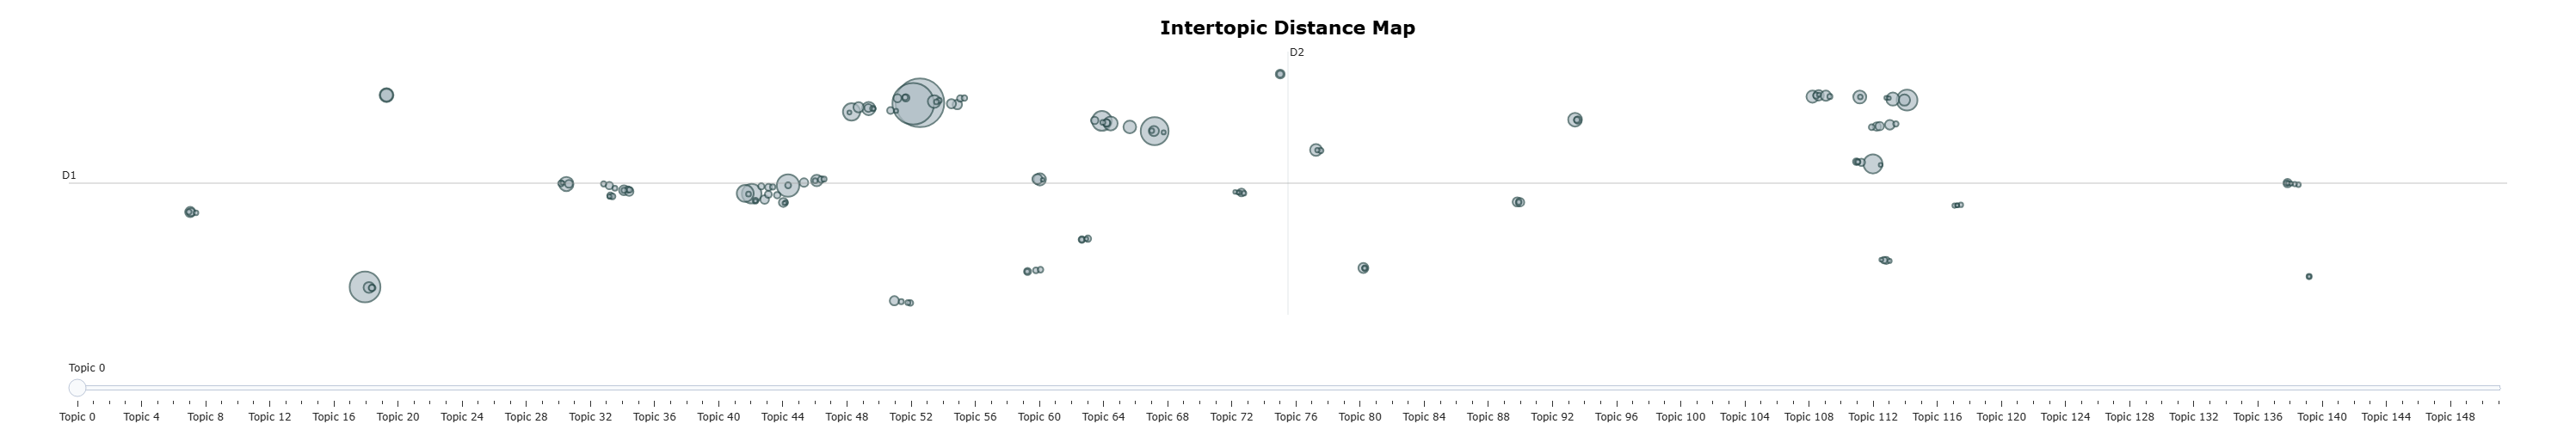

In [120]:
topic_model.visualize_topics(use_ctfidf=True, width=600, height=500)

In light of the large number of clusters, we will **reduce the number of topics to a fixed size of 30**. Although it is generally recommended to iterate and determine the "optimal" number of topics, this process is beyond the scope of this course.

In [121]:
topic_model.reduce_topics(df_claims.claim_description.values, nr_topics=30)

2025-11-16 11:51:42,333 - BERTopic - Topic reduction - Reducing number of topics
2025-11-16 11:51:43,138 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-16 11:51:47,076 - BERTopic - Representation - Completed ✓
2025-11-16 11:51:47,095 - BERTopic - Topic reduction - Reduced number of topics from 153 to 30


In [100]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,43569,-1_fell_customer_water_damage,"[fell, customer, water, damage, vehicle, claim...",[small pd. the iv driver was servicing a custo...
1,0,41494,0_vehicle_driver_side_truck,"[vehicle, driver, side, truck, hit, claimant, ...",[employee was driving east on i-76. traffic h...
2,1,31496,1_damage_rear_struck_front,"[damage, rear, struck, front, bumper, small, d...",[while on the street iv sideswiped the ov. the...
3,2,13970,2_guest_fell_cart_customer,"[guest, fell, cart, customer, slipped, walking...",[a customer was on the parking lot walking whe...
4,3,7908,3_eating_food_found_chicken,"[eating, food, found, chicken, tooth, guest, b...",[claimant alleges he had ordered chicken finge...
5,4,7281,4_claimant_fell_injury_slipped,"[claimant, fell, injury, slipped, due, floor, ...",[claimant alleges she slipped and fell on wate...
6,5,2810,5_fire_gas_pump_fuel,"[fire, gas, pump, fuel, tank, smoke, oil, hose...",[iv rear caught on fire while on the hwy. iv d...
7,6,1943,6_delivery_floor_wall_flooring,"[delivery, floor, wall, flooring, da, payment,...","[damaged floor during delivery, floor scratche..."
8,7,1898,7_reg_bus_passenger_collision,"[reg, bus, passenger, collision, sideswipe, un...",[tp vehicle hit bus when changing lanes ...
9,8,1439,8_approximately_resident_security_office,"[approximately, resident, security, office, un...",[on march 17th 2023 at approximately 1:13 pm t...


By using the `get_document_info()` method, we can identify which cluster has been assigned to each claim.

In [133]:
topic_model.get_document_info(df_claims.claim_description.values).head(3).style

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,"the iv was making a left turn on a green arrow when a pedestrian ran into the p/s of iv. the iv was dented on the front p/s of the hood, then fell backwards to the pavement. the pedestrian experienced a lump on his head.",1,1_damage_rear_struck_front,"['damage', 'rear', 'struck', 'front', 'bumper', 'small', 'driver', 'end', 'ended', 'unoccupied']","['while on the street iv sideswiped the ov. the ov incurred damage to the rear d/s bumper. the iv incurred damage to the front bumperon the d/s. there were no injuries reported.', 'the iv rear ended the ov at a red light. the iv has damage to the front bumper. the ov has damage to the rear bumper. no injuries were reported.', 'small pd iv driver backed into the ov that was parked and unoccupied in a parking lot. iv struck the back p/s of the ov withthe d/s icc bumper. ov incurred rear p/s damage. no injuries were reported.']",damage - rear - struck - front - bumper - small - driver - end - ended - unoccupied,1.000000,False
1,claimant alleges she suffered injuries in an elevator.,19,19_elevator_stuck_floor_approximately,"['elevator', 'stuck', 'floor', 'approximately', 'trapped', 'entrapment', 'resident', 'guest', 'door', 'level']","['claimant tripped on elevator floor while entering the elevator since the elevator was not leveled. allegedly hit her head. service was called on 5/01/23 elevator was repaired', 'cuts and bruises from elevator door', 'claimant alleges she suffered injuries in an elevator.']",elevator - stuck - floor - approximately - trapped - entrapment - resident - guest - door - level,0.703153,True
2,"iv passenger sustained injuries, ov and iv collided causing iv to hit another ov as well",1,1_damage_rear_struck_front,"['damage', 'rear', 'struck', 'front', 'bumper', 'small', 'driver', 'end', 'ended', 'unoccupied']","['while on the street iv sideswiped the ov. the ov incurred damage to the rear d/s bumper. the iv incurred damage to the front bumperon the d/s. there were no injuries reported.', 'the iv rear ended the ov at a red light. the iv has damage to the front bumper. the ov has damage to the rear bumper. no injuries were reported.', 'small pd iv driver backed into the ov that was parked and unoccupied in a parking lot. iv struck the back p/s of the ov withthe d/s icc bumper. ov incurred rear p/s damage. no injuries were reported.']",damage - rear - struck - front - bumper - small - driver - end - ended - unoccupied,0.878347,False


#### <a id='toc4_6_1_'></a>*Bonus*: Using Generative AI to improve topic representations

If you want to follow this subsection of the course, you will need an [**OpenAI**](https://openai.com/) key. You can get yourself setup as follows:
- Create an account. Credit card information required!
- Generate an API key
    
    <img src="img/openai3.png" alt="Open API Key" width="500">

- In the root directroy of your project, create a .env file and save the key in that file: <br>
`OPENAI_API_KEY = <Your OpenAI key>`

The **topic representations above** consist of the **tf-idf weighted top words for each cluster**, providing an initial insight into the cluster's theme. By leveraging **Generative AI**, we can **enhance the cluster representations** to be even more detailed.

Load the API key.

In [134]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Access the API key
openai_api_key = os.getenv("OPENAI_API_KEY")

Instantiate the LLM.

In [135]:
import openai
from bertopic.representation import OpenAI

# Fine-tune topic representations with GPT
client = openai.OpenAI(api_key=openai_api_key)
representation_model = OpenAI(client, model="gpt-4o-mini", chat=True)

Update topic representation using the LLM.

In [136]:
topic_model.update_topics(df_claims.claim_description.values, representation_model=representation_model)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:26<00:00,  1.12it/s]


We can now observe that the **topics are represented by detailed categories generated by the LLM**, which utilized the top tf-idf keywords and the representative documents for each topic. 

While this may look magic at first, the **LLM** was simply **instructed to generate a short topic label given** the `Top_n_words` and `Representative_Docs` for each topic.

In [141]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,43569,-1_Vehicle incident reports,[Vehicle incident reports],[small pd. the iv driver was servicing a custo...
1,0,41494,0_Traffic accident reports,[Traffic accident reports],[employee was driving east on i-76. traffic h...
2,1,31496,1_Parking lot accidents,[Parking lot accidents],[while on the street iv sideswiped the ov. the...
3,2,13970,2_Customer slip incidents,[Customer slip incidents],[a customer was on the parking lot walking whe...
4,3,7908,3_Food safety incidents,[Food safety incidents],[claimant alleges he had ordered chicken finge...
5,4,7281,4_Slip and fall claims,[Slip and fall claims],[claimant alleges she slipped and fell on wate...
6,5,2810,5_Fuel-related incidents,[Fuel-related incidents],[iv rear caught on fire while on the hwy. iv d...
7,6,1943,6_Delivery damage issues,[Delivery damage issues],"[damaged floor during delivery, floor scratche..."
8,7,1898,7_Bus collision incidents,[Bus collision incidents],[tp vehicle hit bus when changing lanes ...
9,8,1439,8_Security incidents reporting,[Security incidents reporting],[on march 17th 2023 at approximately 1:13 pm t...


Some topics seem to be duplicated. We can simply merge them using the `merge_topics()` method.

In [142]:
topics_to_merge = [
    [-1, 21],   # noise topics
    [2, 4, 20]  # slip and fall incidents
]
topic_model.merge_topics(df_claims.claim_description.values, topics_to_merge)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 27/27 [00:19<00:00,  1.40it/s]


In [145]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,43803,-1_Vehicle incident reports,[Vehicle incident reports],[a customer drove into the parking lot and acc...
1,0,41494,0_Vehicle accident reports,[Vehicle accident reports],"[tsp driver was on 50 n/b, claimant in front o..."
2,1,31496,1_Parking lot accidents,[Parking lot accidents],[iv driver was pulling out of the customer's p...
3,2,21503,2_Slip and fall incidents,[Slip and fall incidents],[claimant alleges that she was walking to exit...
4,3,7908,3_Food safety incidents,[Food safety incidents],[claimant alleges that while she was eating an...
5,4,2810,4_Fire incidents involving fuel,[Fire incidents involving fuel],[the customer drove off with the hose for pump...
6,5,1943,5_Delivery damage issues,[Delivery damage issues],[*ecomm (on) - mth -delivery agents scratched ...
7,6,1898,6_Bus collision incidents,[Bus collision incidents],[bus struck with tp parked vehicle. ...
8,7,1439,7_Apartment flooding reports,[Apartment flooding reports],"[on thursday, april 13, 2023 at approximately ..."
9,8,1382,8_Burst pipe damages,[Burst pipe damages],"[water damage from a pipe burst., burst pipe a..."


We can now use the trained topic model to assign any claim description to one of the clusters identified above.

In [146]:
new_claims = [
    'Patient received the wrong dosage of prescribed medication, resulting in adverse side effects. Immediate medical attention was required to correct the error.',
    'The claimant suffered multiple puncture wounds and lacerations after being attacked by a neighbor’s dog. Medical treatment was required, and the incident was reported to animal control.',
    'The iv was involved in a rear-end collision at a parking lot, resulting in significant bumper and trunk damage. No injuries were reported, and a police report was filed at the scene.'
]

In [147]:
topic_model.transform(new_claims)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2025-11-16 12:29:23,227 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-11-16 12:29:23,236 - BERTopic - Dimensionality - Completed ✓
2025-11-16 12:29:23,237 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-11-16 12:29:23,242 - BERTopic - Cluster - Completed ✓


([25, 14, 1], array([1.        , 0.60523352, 0.97859005]))

In [148]:
topic_model.save(
    "models/topic_model", 
    serialization="pytorch", 
    save_ctfidf=True, 
    save_embedding_model="all-MiniLM-L6-v2")

### <a id='toc4_7_'></a>Model Provisioning

When we talk about **deploying a model**, we mean **making the model available for productive use**. This is like putting a finished product on a store shelf so that customers can buy it. While a fully fledged deployment is beyond the scope of this course, we learn two ways how to make our trained model more accesible to users.

#### <a id='toc4_7_1_'></a>Streamlit

Streamlit is an open-source app framework that simplifies **creating interactive web applications** with minimal effort. It provides a **user-friendly interface for users to input data and interact with the model** in real-time, making it easier to demonstrate the model's capabilities and gather user feedback.

In [151]:
!streamlit run nlp_streamlit.py

^C


Wait for the local server to open in your web browser.

![Streamlit](img/streamlit.gif)

#### <a id='toc4_7_2_'></a>FastAPI

FastAPI streamlines the deployment process by enabling developers to create **APIs** (Application Programming Interfaces), which facilitate communication between different software programs. An API includes an **inference point** where a **trained model is hosted**, allowing **users** to **send input data** and **receive real-time predictions**.

In [154]:
!set PYTHONIOENCODING=utf-8 && fastapi dev nlp_fastapi.py

^C


      INFO   Will watch for changes in these directories: 
             ['w:\\teaching\\risk_analytics\\2_nlp']
     ERROR   [WinError 10013] Der Zugriff auf einen Socket war aufgrund der 
             Zugriffsrechte des Sockets unzulässig


Access the API documentation at [http://127.0.0.1:8000/docs](http://127.0.0.1:8000/docs).

![FastAPI](img/fastapi.gif)
